In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# check numpy version
print(np.__version__)

2.0.2


In [3]:
def chessboard(shape):
  return np.indices(shape).sum(axis=0) % 2

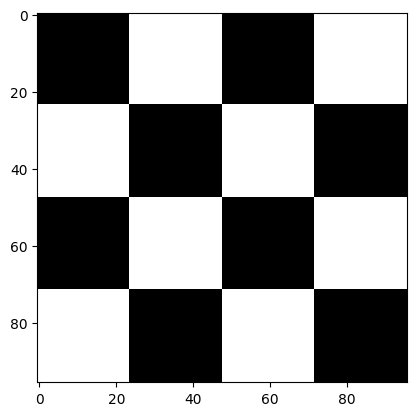

In [4]:
img = chessboard((4,4))*255
img = np.repeat(img, (24), axis=0)
img = np.repeat(img, (24), axis=1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [5]:
from matplotlib import image
dog = image.imread('assets/aki_dog.jpg')

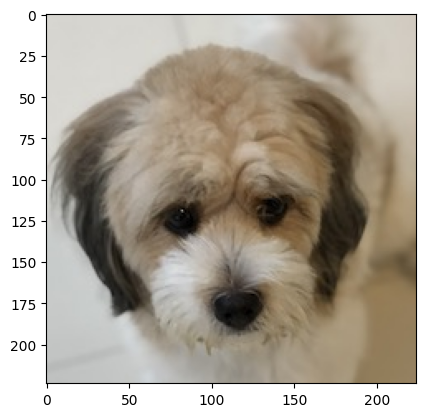

In [6]:
plt.imshow(dog);

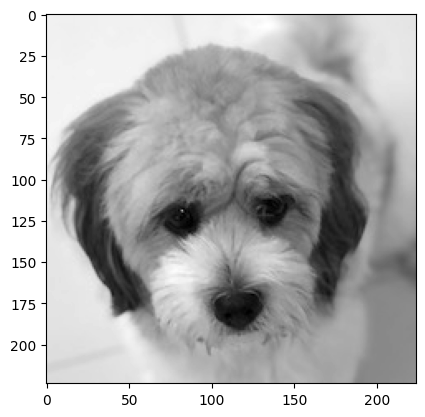

In [7]:
plt.imshow(np.mean(dog,axis=-1), cmap='gray');


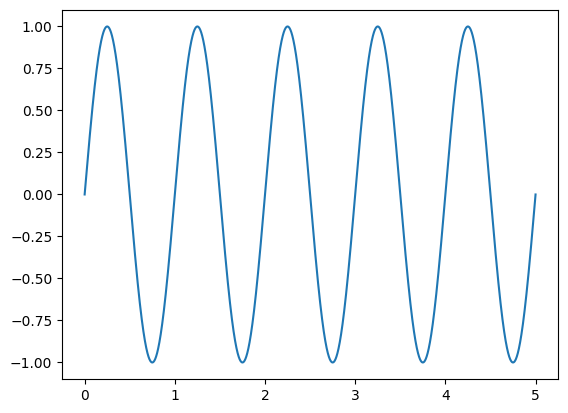

In [8]:
samples_per_sec = 22050
freq = 1
n_points = samples_per_sec*5
t = np.linspace(0,5,n_points)
data = np.sin(2*np.pi*freq*t)
plt.plot(t,data);